In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%cd /workspace/EveryDream2trainer-remote

/workspace/EveryDream2trainer-remote


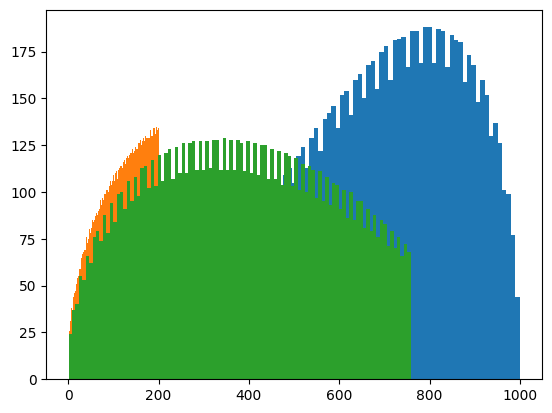

In [13]:
import argparse

import matplotlib.pyplot as plt
from loss import get_multirank_stratified_random_timesteps

_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=3, beta=1.5

                                                       ), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.5, beta=2), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1, beta=1, distribution='mode', mode_scale=0.5), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', distribution='lognormal'), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=2, beta=1.1), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=0.9, beta=0.9), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=3, beta=3), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.2, beta=3), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.2, beta=1.8), bins=100)
#_ = plt.hist(get_multirank_stratified_random_timesteps(100000, device='cpu', alpha=1.1, beta=2), bins=100)

_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.5, beta=2, min_01=0.8, max_01=1), bins=100)

_ = plt.hist(get_multirank_stratified_random_timesteps(10000, device='cpu', alpha=1.5, beta=2, min_01=0.1, max_01=1), bins=100)


In [1]:

from scipy.stats import beta as sp_beta
import torch
_ = plt.plot(sp_beta.ppf(q=torch.linspace(0, 1, 1000).numpy(), a=3, b=3, loc=-0.5, scale=0.5))



NameError: name 'plt' is not defined

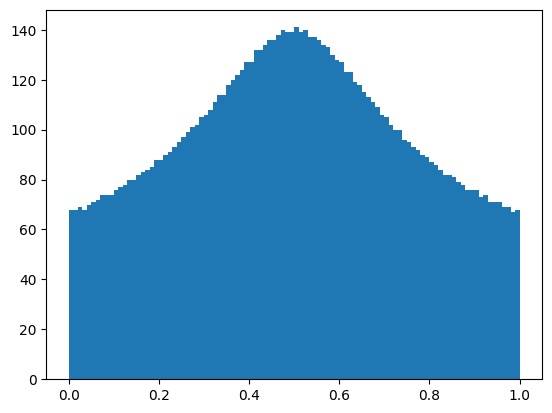

In [29]:
batch_size = 10000
mode_scale = 0.5
import math
import torch
indices = torch.arange(0, batch_size, dtype=torch.float64)
u = torch.rand(size=(batch_size,))
u = (indices + u) / batch_size
u = 1 - u - mode_scale * (torch.cos(math.pi * u / 2) ** 2 - 1 + u)
_ = plt.hist(u.numpy(), bins=100)

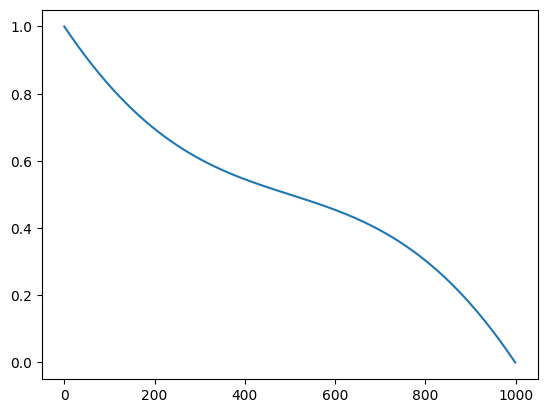

In [23]:
from loss import _get_mode_sigmas
import torch
_ = plt.plot(_get_mode_sigmas(torch.linspace(0, 1, 1000), mode_scale=1))

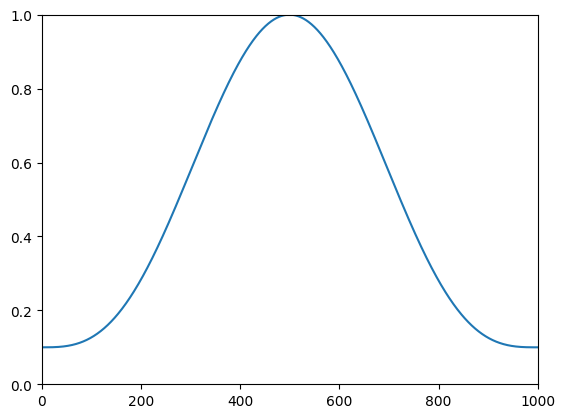

In [19]:
import math
import torch
import matplotlib.pyplot as plt

def _pdf(x, sharpness=2.0):
    # Cosine-based bump centered at 0.5
    return (torch.cos(math.pi * (x - 0.5)) ** sharpness + 1) / 2

def pdf(timesteps):
    t_normalized = timesteps.float() / 1000.0  # normalize to [0, 1]
    sharpness = 3
    mode_weight = (torch.cos(math.pi * (t_normalized - 0.5)) ** sharpness + 1) - 1
    mode_weight = (1-loss_mode_scale) + loss_mode_scale*mode_weight
    return mode_weight

plt.axis([0, 1000, 0, 1])
loss_mode_scale = 0.9
_ = plt.plot(pdf(torch.linspace(0, 1000, 1000)))

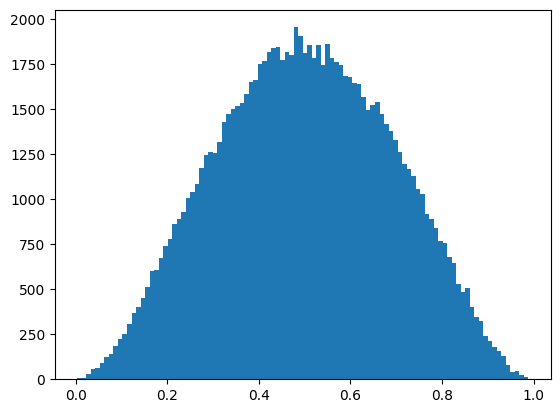

In [28]:
from scipy.stats import beta as sp_beta
u = torch.rand(size=(batch_size,))
_ = plt.hist(sp_beta.ppf(u.numpy(), a=3, b=3), bins=100)

In [1]:
import random
import argparse
import logging

batch = {'captions': {'default': ['a cat', 'a dog'], 'variant1': ['a cute cat', None], 'variant2': [None, 'a big dog'], 'variant3': ['a small cat', 'a big dog']}}
args = argparse.Namespace(caption_variants=['variant1', '*'])

caption_candidates = []
available_non_default = [k for k in batch["captions"].keys() if k != "default"]

if args.caption_variants:
    available_requested = list(set(available_non_default).intersection(set(args.caption_variants)))
    if '*' in args.caption_variants:
        available_requested.append('*')

    if available_requested:
        requested_choice = random.choice(available_requested)
        print('requested_choice: ', requested_choice)
        if requested_choice == '*':
            caption_candidates = available_non_default
        else:
            caption_candidates = [requested_choice]
else:
    caption_candidates = available_non_default

if len(caption_candidates) == 0:
    caption_candidates.append("default")
    if "default" not in batch["captions"]:
        logging.info(f"surprise cond dropout: ** Apparently no captions: {batch.get('pathnames', '(no paths)')}: {batch['captions']}")
        batch["captions"]["default"] = [train_batch.cond_dropout_caption] * image_shape[0]
        batch["tokens"]["default"] = [train_batch.cond_dropout_tokens] * image_shape[0]
caption_variants = [random.choice(caption_candidates)]
print('picked caption variant: ', caption_variants)


requested_choice:  *
picked caption variant:  ['variant1']


In [4]:
from collections import Counter

counter = Counter([t.item() for t in timesteps])
[counter[i] for i in range(1000)]

NameError: name 'timesteps' is not defined

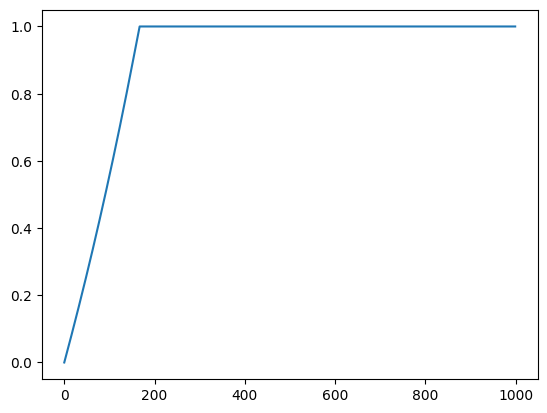

In [32]:
import torch
from matplotlib import pyplot as plt
min_snr_gamma = 5

timesteps = torch.arange(0, 1000)
t = timesteps / 1000
snr = (1 - t) / (t + 1e-8)  # Linear approximation
snr_weight = torch.minimum(snr, torch.tensor(min_snr_gamma)) / (snr + 1e-8)
_ = plt.plot(snr_weight)

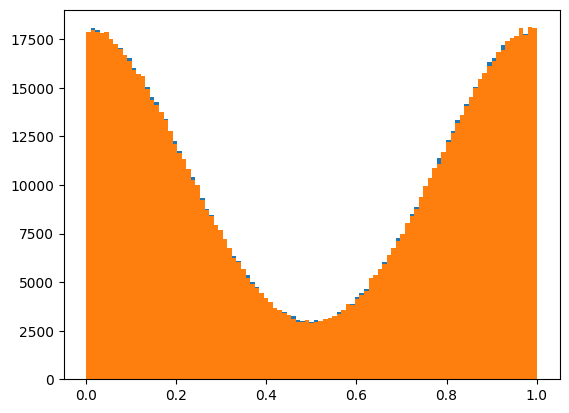

In [30]:
def get_boundary_oversampling_timesteps(k, lambda_=1.0):
    n_bins = 1000
    t_bins = torch.linspace(0, 1, n_bins)

    # Compute unnormalized weights
    w = 1 + lambda_ * (torch.exp(-10 * t_bins**2) + torch.exp(-10 * (t_bins - 1)**2))

    # Sample indices according to weights
    indices = torch.multinomial(w, k, replacement=True)

    # Add jitter within bins for continuity
    jitter = torch.rand(k) / n_bins
    t_samples = t_bins[indices] + jitter

    return t_samples#.clamp(0, 1)

_ = plt.hist(get_boundary_oversampling_timesteps(1000000, lambda_=1e3).numpy(), bins=99)
_ = plt.hist(get_boundary_oversampling_timesteps(1000000, lambda_=1e5).numpy(), bins=99)

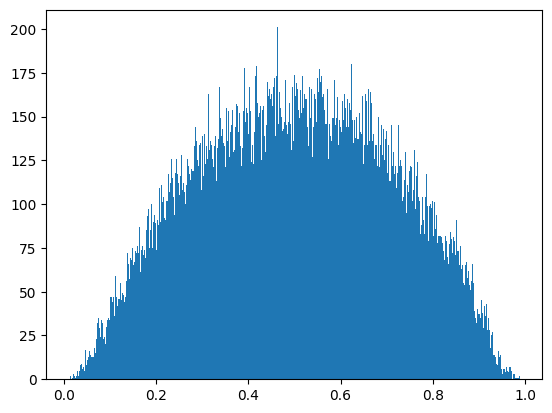

In [7]:
import torch
import matplotlib.pyplot as plt
batch_size = 100000
std = 1
mean = 0
u = torch.randn(batch_size) * std + mean
sigmas = torch.sigmoid(u)
_ = plt.hist(sigmas.numpy(), bins=1000)
